# Exercise 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

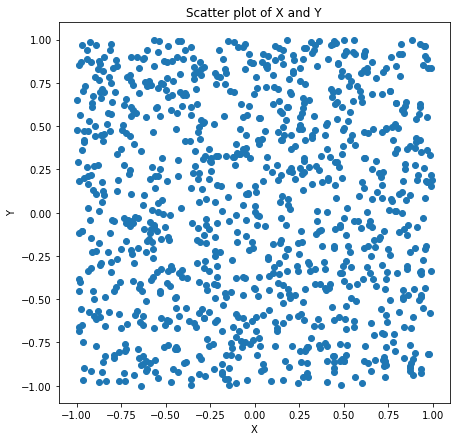

In [2]:
def generated_sample(size):
    X = np.random.uniform(-1,1)
    Y = np.random.uniform(-1,1)
    return X, Y

X = np.empty(1000)
Y = np.empty(1000)

for i in range(1000):
    X[i], Y[i] = generated_sample(i)
    
plt.figure(figsize=(7,7))
plt.scatter(X, Y, alpha = 1)
plt.title(f'Scatter plot of X and Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

P(X,Y) in B1: 0.819672131147541


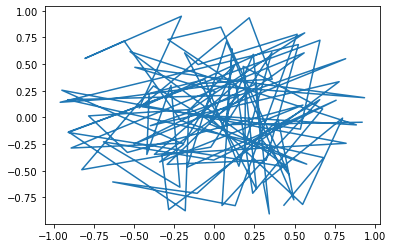

In [3]:
def approx_pi(n):
    total = 0
    value_in = 0
    Z1 = []
    Z2 = []
    while value_in < n:
        z1 = np.random.uniform(-1,1)
        z2 = np.random.uniform(-1,1)
        if np.sqrt(z1*z1 + z2*z2)<= 1:
            Z1.append(z1)
            Z2.append(z2)
            value_in += 1
        total +=1
    return (Z1, Z2, value_in, total)

pi100 = approx_pi(100)
plt.plot(pi100[0], pi100[1])
print("P(X,Y) in B1:", pi100[2]/pi100[3])

## Question 3
$\mathbb{P}\left( (X, Y) \in B_1 \right) = \lim\limits_{total \to +\infty} \frac{value\_in}{total}$ <br>
We can reach to $\pi$ by using the area of circle and square [-1, 1]x[-1, 1].  
$\mathbb{P}\left( (X, Y) \in B_1 \right) = \frac{\pi R^2}{2^2}$  
$\pi = 4 \mathbb{P}\left( (X, Y) \in B_1 \right)$  
By increasing the total of point using in our sample, we get $\pi$ 

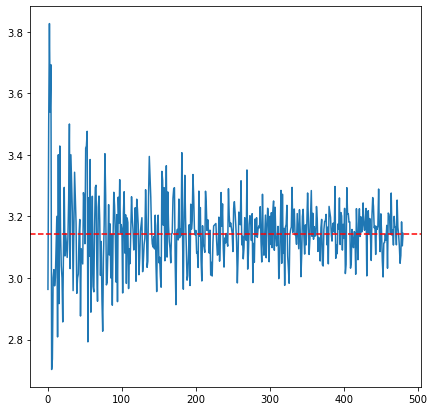

In [5]:
pi_list = []
for i in range(10, 501):
    pi_eval = approx_pi(i)
    value = pi_eval[2]/pi_eval[3]
    pi_list.append(4*value)
    
plt.figure(figsize=(7, 7))
plt.plot(pi_list[10:])
plt.axhline(y=np.pi, color = 'r', linestyle = '--')

Soit $(X, Y)$ une variable aléatoire uniforme sur $[-1, 1] \times [-1, 1]$, et un disque $B_1$ de rayon 1 centré à l'origine.

Considérons $(X_1, Y_1), \dots, (X_n, Y_n)$ des variables aléatoires indépendantes suivant la même loi que $(X, Y)$, i.e., uniformément distribuées dans le carré $[-1, 1] \times [-1, 1]$.

Définissons pour chaque $i$, la variable $C_i$ comme :

$$
C_i =
\begin{cases}
1 & \text{si } (X_i, Y_i) \in B_1 \ (\text{le disque de rayon 1}), \\
0 & \text{sinon}.
\end{cases}
$$

### Distribution de $C_i$

Chaque $C_i$ est une variable aléatoire indicatrice. Elle suit une loi de Bernoulli, notée :

$$
C_i \sim \text{Bernoulli}(p),
$$

où $p$ est la probabilité qu'un point aléatoire $(X_i, Y_i)$ tombe dans le disque $B_1$. Cette probabilité est donnée par le rapport des aires du disque et du carré.

L'aire du carré est $4$, et l'aire du disque $B_1$ est $\pi$, donc :

$$
p = \frac{\text{aire du disque}}{\text{aire du carré}} = \frac{\pi}{4}.
$$

Ainsi, $C_i \sim \text{Bernoulli}\left(\frac{\pi}{4}\right)$.

### Distribution de $\bar{C}_n$

La quantité $\bar{C}_n$ est la moyenne empirique du nombre de points qui tombent dans le disque $B_1$, donnée par :

$$
\bar{C}_n = \frac{1}{n} \sum_{i=1}^{n} C_i.
$$

Comme la somme $\sum_{i=1}^{n} C_i$ suit une loi binomiale :

$$
\sum_{i=1}^{n} C_i \sim \text{Binomial}(n, \frac{\pi}{4}),
$$

la moyenne $\bar{C}_n$ est une version normalisée de cette binomiale. Plus précisément, $\bar{C}_n$ suit la loi d'une binomiale normalisée :

$$
\bar{C}_n = \frac{1}{n} \sum_{i=1}^{n} C_i \sim \frac{1}{n} \cdot \text{Binomial}(n, \frac{\pi}{4}).
$$

### Approximation asymptotique

Par la loi des grands nombres, lorsque $n \to \infty$, la moyenne $\bar{C}_n$ converge vers l'espérance de $C_i$, qui est $ \frac{\pi}{4} $ :

$$
\bar{C}_n \xrightarrow{n \to \infty} \frac{\pi}{4}.
$$

De plus, par le théorème central limite, pour de grands $n$, $\bar{C}_n$ suit approximativement une loi normale :

$$
\bar{C}_n \sim \mathcal{N}\left( \frac{\pi}{4}, \frac{\frac{\pi}{4} \left( 1 - \frac{\pi}{4} \right)}{n} \right).
$$

Cette approximation devient de plus en plus précise à mesure que $n$ augmente.


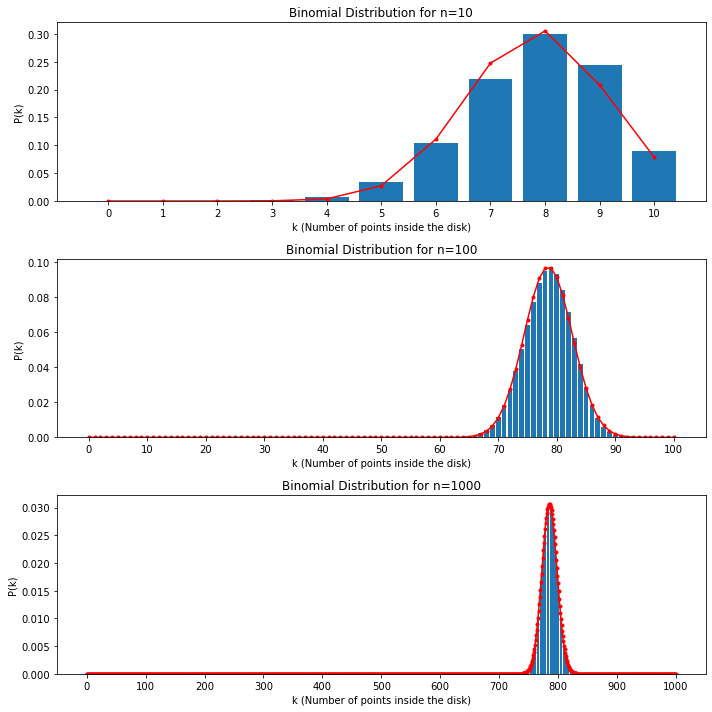

In [15]:
from scipy.special import binom
from scipy.stats import norm

# Parameters
p = np.pi / 4  # Probability of being in the disk
n_values = [10, 100, 1000]  # Different values of n to test

# Function to compute binomial probabilities
def binomial_probabilities(n, p):
    k_values = np.arange(0, n + 1)
    probabilities = binom(n, k_values) * (p**k_values) * ((1 - p)**(n - k_values))
    return k_values, probabilities

# Function to plot the binomial probabilities
def plot_binomial_probabilities(n_values, p):
    plt.figure(figsize=(10, 10))
    
    for i, n in enumerate(n_values, 1):
        k_values, probabilities = binomial_probabilities(n, p)
        
        plt.subplot(3, 1, i)
        plt.bar(k_values, probabilities)
        plt.plot(k_values, norm.pdf(k_values, n*np.pi/4, np.sqrt(n*np.pi/4*(1-np.pi/4))),'r.-')
        plt.title(f'Binomial Distribution for n={n}')
        plt.xlabel('k (Number of points inside the disk)')
        plt.ylabel('P(k)')
        plt.xticks(np.arange(0, n+1, step=n//10))
    
    plt.tight_layout()
    plt.show()

# Plot the binomial probabilities for n = 10, 100, 1000
plot_binomial_probabilities(n_values, p)


Soit $\bar{C}_n$ la moyenne des variables indicatrices $C_i$. Nous voulons déterminer la probabilité suivante :

$$
\mathbb{P}(a \leq \bar{C}_n \leq b).
$$

### Distribution de $\bar{C}_n$

Nous avons établi précédemment que :

$$
\bar{C}_n \sim \mathcal{N}\left( \frac{\pi}{4}, \frac{\frac{\pi}{4} \left( 1 - \frac{\pi}{4} \right)}{n} \right).
$$

Posons :

- $\mu = \frac{\pi}{4}$, qui est la moyenne.
- $\sigma^2 = \frac{\frac{\pi}{4} \left( 1 - \frac{\pi}{4} \right)}{n}$, qui est la variance.

Pour normaliser $\bar{C}_n$, nous définissons la variable standardisée $Z$ :

$$
Z = \frac{\bar{C}_n - \mu}{\sigma} \sim \mathcal{N}(0, 1).
$$

### Calcul de $P(a \leq \bar{C}_n \leq b)$

Nous pouvons réécrire l'inégalité :

$$
P(a \leq \bar{C}_n \leq b) = P\left(\frac{a - \mu}{\sigma} \leq Z \leq \frac{b - \mu}{\sigma}\right).
$$

En utilisant la fonction de répartition de la loi normale standard $\Phi$, nous avons :

$$
P(a \leq \bar{C}_n \leq b) = \Phi\left(\frac{b - \mu}{\sigma}\right) - \Phi\left(\frac{a - \mu}{\sigma}\right).
$$

### Application numérique

Pour effectuer ce calcul, nous devons substituer les valeurs de $\mu$ et $\sigma$. 

1. **Calculer $\mu$** :
   $$ 
   \mu = \frac{\pi}{4} \approx 0.7854. 
   $$

2. **Calculer $\sigma$** :
   $$ 
   \sigma = \sqrt{\frac{\frac{\pi}{4} \left( 1 - \frac{\pi}{4} \right)}{n}}. 
   $$

3. **Calculer les valeurs normalisées** :
   - Pour $a$ :
   $$
   z_a = \frac{a - \mu}{\sigma}.
   $$

   - Pour $b$ :
   $$
   z_b = \frac{b - \mu}{\sigma}.
   $$

4. **Utiliser la table des lois normales** :
   Recherchez les valeurs $z_a$ et $z_b$ dans la table de la loi normale standard pour obtenir $\Phi(z_a)$ et $\Phi(z_b)$.

5. **Finaliser le calcul** :
   $$ 
   P(a \leq \bar{C}_n \leq b) = \Phi(z_b) - \Phi(z_a).
   $$

### Conclusion

Ainsi, pour déterminer $P(a \leq \bar{C}_n \leq b)$, il faut effectuer les calculs ci-dessus avec les valeurs spécifiques de $a$, $b$, et $n$. 


### Intervalle de confiance symétrique pour $E[C_i]$

Pour estimer $E[C_i]$ avec un intervalle de confiance symétrique exact de niveau $1 - \alpha$, nous utilisons la loi binomiale. Puisque $C_i \sim \text{Bernoulli}(p)$ avec $p = \frac{\pi}{4}$, la somme $S_n = \sum_{i=1}^{n} C_i$ suit une loi binomiale :

$$
S_n \sim \text{Binomial}(n, p).
$$

L'estimateur pour la proportion est donné par :

$$
\hat{p} = \frac{S_n}{n} = \bar{C}_n.
$$

Pour construire un intervalle de confiance, nous utilisons la distribution binomiale pour trouver les quantiles. L'intervalle de confiance symétrique exact pour $E[C_i]$ est donné par :

$$
\left[ \hat{p} - z_{\alpha/2} \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}, \hat{p} + z_{\alpha/2} \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}} \right],
$$

où $z_{\alpha/2}$ est le quantile de la distribution normale standard correspondant à un niveau de confiance de $1 - \alpha$.

### Fonction Python

Voici une fonction Python qui calcule cet intervalle de confiance :

```python
import numpy as np
from scipy.stats import norm

def confidence_interval(alpha, n):
    # Probabilité de succès
    p_hat = np.pi / 4
    # Quantile de la loi normale
    z = norm.ppf(1 - alpha / 2)
    # Calcul de l'intervalle de confiance
    margin_of_error = z * np.sqrt(p_hat * (1 - p_hat) / n)
    lower_bound = p_hat - margin_of_error
    upper_bound = p_hat + margin_of_error
    return (lower_bound, upper_bound)


### Convergence de la Distribution

Lorsque $n$ augmente, la distribution de $\bar{C}_n$ se rapproche d'une distribution gaussienne. Plus précisément, selon le théorème central limite, lorsque $n \to \infty$, la distribution de $\bar{C}_n$ peut être approximée par une distribution normale dont les paramètres sont donnés par :

- **Moyenne** : $E[\bar{C}_n] = \frac{\pi}{4}$
- **Variance** : $Var(\bar{C}_n) = \frac{\frac{\pi}{4} \left(1 - \frac{\pi}{4}\right)}{n}$

### Ajout des Courbes Gaussiennes

Pour chaque histogramme représentant la distribution binomiale pour des valeurs de $n$, nous pouvons ajouter la courbe gaussienne correspondante. Les courbes gaussiennes sont données par la fonction de densité de probabilité :

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}},
$$

où $\mu = \frac{\pi}{4}$ et $\sigma = \sqrt{Var(\bar{C}_n)} = \sqrt{\frac{\frac{\pi}{4} \left(1 - \frac{\pi}{4}\right)}{n}}$.

### Simulation et Visualisation

Nous utiliserons les probabilités binomiales et la fonction de densité de la distribution normale pour créer des graphiques qui illustrent cette convergence.


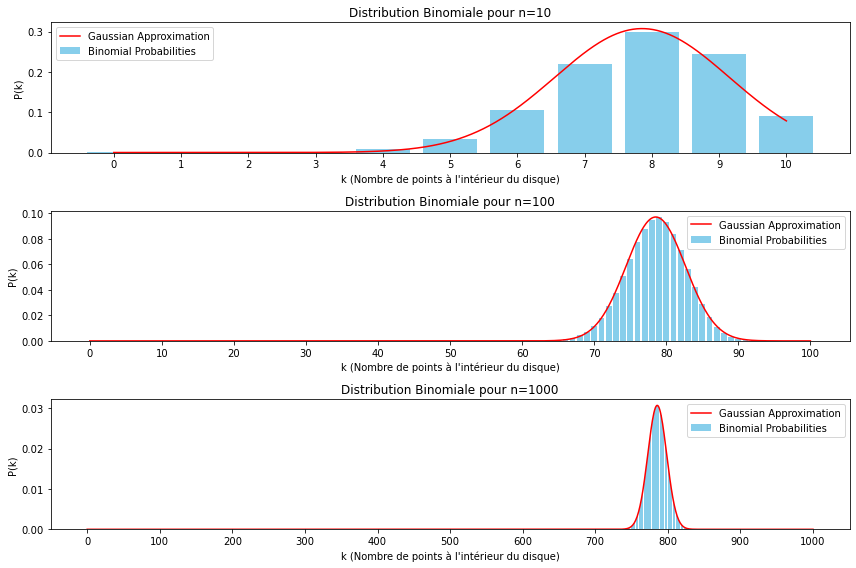

In [16]:
from scipy.special import binom
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
p = np.pi / 4  # Probabilité d'être dans le disque
n_values = [10, 100, 1000]  # Différentes valeurs de n à tester

# Fonction pour calculer les probabilités binomiales
def binomial_probabilities(n, p):
    k_values = np.arange(0, n + 1)
    probabilities = binom(n, k_values) * (p**k_values) * ((1 - p)**(n - k_values))
    return k_values, probabilities

# Fonction pour tracer les probabilités binomiales
def plot_binomial_probabilities(n_values, p):
    plt.figure(figsize=(12, 8))
    
    for i, n in enumerate(n_values, 1):
        k_values, probabilities = binomial_probabilities(n, p)
        
        # Tracer l'histogramme des probabilités binomiales
        plt.subplot(3, 1, i)
        plt.bar(k_values, probabilities, color='skyblue', label='Binomial Probabilities')
        
        # Paramètres de la distribution normale
        mu = p * n
        sigma = np.sqrt(p * (1 - p) * n)
        
        # Tracer la courbe gaussienne
        x = np.linspace(0, n, 1000)
        gaussian = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
        
        plt.plot(x, gaussian, color='red', label='Gaussian Approximation')
        plt.title(f'Distribution Binomiale pour n={n}')
        plt.xlabel('k (Nombre de points à l\'intérieur du disque)')
        plt.ylabel('P(k)')
        plt.xticks(np.arange(0, n + 1, step=n // 10))
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Tracer les probabilités binomiales pour n = 10, 100, 1000
plot_binomial_probabilities(n_values, p)


## Intervalle de Confiance Symétrique Asymptotique

Un intervalle de confiance symétrique asymptotique pour une proportion $p$ peut être construit à partir de l'estimation de la moyenne d'une variable aléatoire suivant une loi binomiale. Pour un grand échantillon, la loi binomiale peut être approximée par une loi normale grâce au théorème central limite.

### Formulation de l'Intervalle de Confiance

L'intervalle de confiance asymptotique pour une proportion $p$ est donné par :

$$
\hat{p} \pm z_{\alpha/2} \cdot \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}},
$$

où :
- $\hat{p}$ est l'estimation de la proportion, calculée comme $\frac{X}{n}$, avec $X$ le nombre de succès,
- $n$ est la taille de l'échantillon,
- $z_{\alpha/2}$ est le quantile de la loi normale standard pour un niveau de confiance donné.

### Implémentation en Python

Voici une fonction Python qui calcule cet intervalle de confiance pour différentes tailles d'échantillon :

```python
from scipy.special import binom
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Paramètres
p = np.pi / 4  # Probabilité d'être dans le disque
n_values = [10, 100, 1000]  # Différentes valeurs de n à tester
alpha = 0.05  # Niveau de confiance

# Fonction pour calculer l'intervalle de confiance
def confidence_interval(p_hat, n, alpha):
    z = norm.ppf(1 - alpha / 2)  # Quantile de la loi normale
    margin_of_error = z * np.sqrt(p_hat * (1 - p_hat) / n)
    return p_hat - margin_of_error, p_hat + margin_of_error

# Calcul et affichage des intervalles de confiance
for n in n_values:
    # Estimation de p avec une loi binomiale
    p_hat = np.random.binomial(n, p) / n
    ci_lower, ci_upper = confidence_interval(p_hat, n, alpha)
    print(f'n={n}: Intervalle de confiance = ({ci_lower:.4f}, {ci_upper:.4f})')


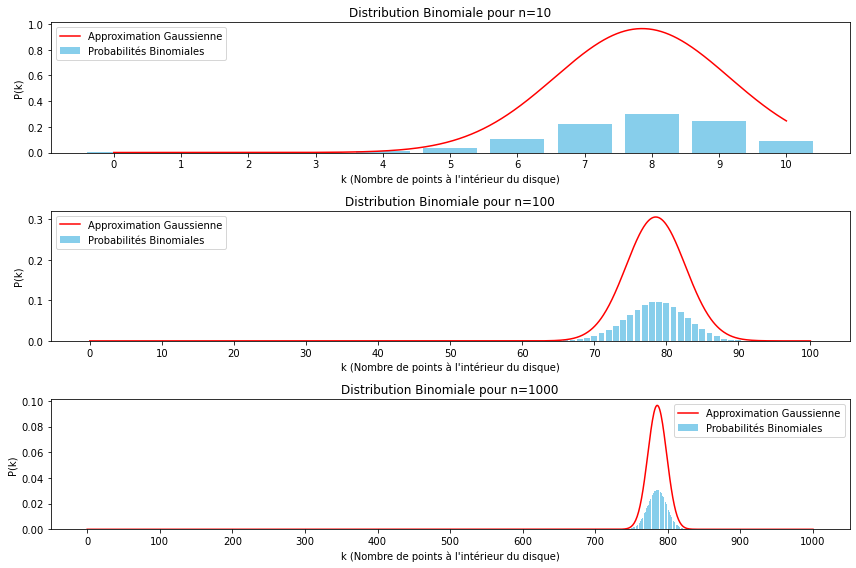

In [17]:
# Fonction pour calculer les probabilités binomiales
def binomial_probabilities(n, p):
    k_values = np.arange(0, n + 1)
    probabilities = binom(n, k_values) * (p**k_values) * ((1 - p)**(n - k_values))
    return k_values, probabilities

# Fonction pour tracer les probabilités binomiales
def plot_binomial_probabilities(n_values, p):
    plt.figure(figsize=(12, 8))
    
    for i, n in enumerate(n_values, 1):
        k_values, probabilities = binomial_probabilities(n, p)
        
        # Tracer l'histogramme des probabilités binomiales
        plt.subplot(3, 1, i)
        plt.bar(k_values, probabilities, color='skyblue', label='Probabilités Binomiales')
        
        # Paramètres de la distribution normale
        mu = p * n
        sigma = np.sqrt(p * (1 - p) * n)
        
        # Tracer la courbe gaussienne
        x = np.linspace(0, n, 1000)
        gaussian = (1 / (sigma * np.sqrt(2/np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
        
        plt.plot(x, gaussian, color='red', label='Approximation Gaussienne')
        plt.title(f'Distribution Binomiale pour n={n}')
        plt.xlabel('k (Nombre de points à l\'intérieur du disque)')
        plt.ylabel('P(k)')
        plt.xticks(np.arange(0, n + 1, step=n // 10))
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Tracer les probabilités binomiales pour n = 10, 100, 1000
plot_binomial_probabilities(n_values, p)


Supposons maintenant que les feuilles tombent plus près de l'arbre de manière à ce que $(Z_1, Z_2) \sim N\left(\begin{pmatrix} 0 \\ 0 \end{pmatrix}, I_2\right)$.

### 1. Distribution de $(Z_1^2, Z_2^2)$ et $Z_1^2 + Z_2^2$

Les variables $Z_1$ et $Z_2$ suivent une distribution normale centrée et indépendante. Par conséquent, $Z_1^2$ et $Z_2^2$ suivent des distributions $\chi^2$ avec 1 degré de liberté :

$$
Z_1^2 \sim \chi^2(1), \quad Z_2^2 \sim \chi^2(1).
$$

La somme $Z_1^2 + Z_2^2$ suit une distribution $\chi^2$ avec 2 degrés de liberté :

$$
Z_1^2 + Z_2^2 \sim \chi^2(2).
$$

### 2. Déduire $P\left((Z_1, Z_2) \in B_1\right)$

Le disque $B_1$ de rayon 1 est défini par :

$$
B_1 = \{(x, y) \mid x^2 + y^2 \leq 1\}.
$$

La probabilité que $(Z_1, Z_2)$ tombe dans le disque est donnée par :

$$
P\left((Z_1, Z_2) \in B_1\right) = P(Z_1^2 + Z_2^2 \leq 1).
$$

Sachant que $Z_1^2 + Z_2^2 \sim \chi^2(2)$, cette probabilité peut être exprimée comme :

$$
P(Z_1^2 + Z_2^2 \leq 1) = \int_0^1 \frac{1}{2\pi} \, d\theta = \frac{\pi}{4}.
$$

### 3. Approximations de $\pi$ à partir des échantillons des variables $Z_1$ ou $Z_2$

On peut utiliser la probabilité trouvée pour estimer $\pi$ à partir des échantillons des variables $Z_1$ et $Z_2$. Si nous générons $n$ échantillons de $(Z_1, Z_2)$ et comptons le nombre $N$ d'échantillons dans le disque $B_1$, alors une approximation de $\pi$ est donnée par :

$$
\pi \approx 4 \cdot \frac{N}{n}.
$$

### 4. Estimations de la variance $\sigma_1^2 = \text{Var}(Z_1)$ et $\sigma_2^2 = \text{Var}(Z_2)$ avec intervalles de confiance

Soit $Z_1, Z_2$ des variables indépendantes et centrées avec des variances inconnues. On peut estimer ces variances à partir des échantillons $Z_1$ et $Z_2$. Voici une fonction Python pour calculer les estimateurs et les intervalles de confiance associés :

```python
import numpy as np
import scipy.stats as stats

def estimate_variances_with_ci(samples, confidence_level=0.95):
    n = len(samples)
    sample_mean = np.mean(samples)
    sample_var = np.var(samples, ddof=1)  # Unbiased estimator
    alpha = 1 - confidence_level
    
    # Intervalle de confiance
    critical_value = stats.t.ppf(1 - alpha/2, n - 1)
    margin_of_error = critical_value * np.sqrt(sample_var / n)
    
    lower_bound = sample_var - margin_of_error
    upper_bound = sample_var + margin_of_error
    
    return {
        "mean": sample_mean,
        "variance": sample_var,
        "confidence_interval": (lower_bound, upper_bound)
    }